In [1]:
from cranes import *

set_plot_formatting()

#### extract gis data from files

In [2]:
gis_folder = 'gis_data/'

mapped_inventory_file = gis_folder+'Downtown.geojson'
sf_boundary_file = gis_folder+'SF Shoreline and Islands.geojson'
other_buildings_file = gis_folder+'Districts3and6.geojson'

In [3]:
mapped_bldgs = gpd.read_file(mapped_inventory_file)
mapped_bldgs.set_index('id', inplace=True)

sf_boundary_map = gpd.read_file(sf_boundary_file)
other_buildings = gpd.read_file(other_buildings_file)   

#### switch all geopandas to desired projection

In [4]:
mapped_bldgs = mapped_bldgs.to_crs(epsg=2227)
sf_boundary_map = sf_boundary_map.to_crs(epsg=2227)
other_buildings = other_buildings.to_crs(epsg=2227)

#### set boundaries of the figure

In [5]:
analysis_bounds = mapped_bldgs.bounds
analysis_xlim = [min(analysis_bounds['minx']), max(analysis_bounds['maxx'])]
analysis_ylim = [min(analysis_bounds['miny']), max(analysis_bounds['maxy'])]
buffer = 100
xlim = [analysis_xlim[0]-buffer, analysis_xlim[1]+2*buffer]
ylim = [analysis_ylim[0]-buffer, analysis_ylim[1]+2*buffer]

#### occupancy map

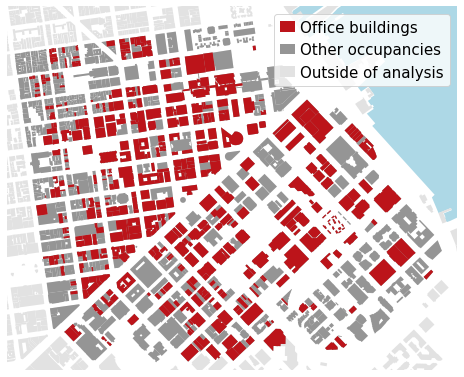

In [6]:
# set colors
color_values = [0.8, 0.5, 0.2]
color_palettes = ['Reds', 'Greys', 'Greys']
colors = [mpl.cm.get_cmap(color_palettes[i])(color_values[i])[:-1] for i in range(len(color_values))]
colors = [mpl.colors.to_hex(colors[i]) for i in range(len(colors))]


fig, ax = plt.subplots(1,1, figsize=(7.5,5.5))
# white background of the ground
_ = sf_boundary_map.plot(ax=ax, color='white')
# all buildings for context, light gray
_ = other_buildings.plot(ax=ax, color=colors[2])
# downtown buildings, dark gray
_ = mapped_bldgs.plot(ax=ax, color=colors[1])

# office buildings, red
idx = mapped_bldgs['building.occupancy_id']=='Commercial Office'
_ = mapped_bldgs[idx].plot(ax=ax, color=colors[0])

legend_elements = [Patch(facecolor=colors[0], label='Office buildings'),
                   Patch(facecolor=colors[1], label='Other occupancies'),
                   Patch(facecolor=colors[2], label='Outside of analysis')]
_ = ax.legend(handles=legend_elements,
              handlelength=1, handletextpad=0.3)

# blue of the water
_ = ax.fill_between(xlim,[ylim[0]*2, ylim[1]*2],color='lightblue', zorder=-5)

_ = ax.set_xlim(xlim)
_ = ax.set_ylim(ylim)
_ = ax.axis('off')
_ = plt.tight_layout()

filename = '2d_occupancy_map'
_ = plt.savefig('figures_pdf/'+filename+'.pdf', bbox_inches='tight', pad_inches=0)
_ = plt.savefig('figures_png/'+filename+'.png', dpi=300, bbox_inches='tight', facecolor='lightblue', pad_inches=0)


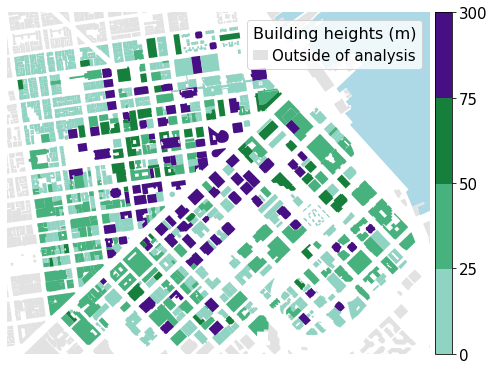

In [7]:
# set colors
color_values = [0.2, 0.4, 0.6, 0.8, 0.95]
color_palettes = ['Greys', 'BuGn', 'BuGn', 'BuGn', 'Purples']
colors = [mpl.cm.get_cmap(color_palettes[i])(color_values[i])[:-1] for i in range(len(color_values))] 
colors = [mpl.colors.to_hex(colors[i]) for i in range(len(colors))]
cmap = mpl.colors.ListedColormap(colors[1:])

fig, ax = plt.subplots(1,1, figsize=(7.5, 5.4))
# white background of the ground
_ = sf_boundary_map.plot(ax=ax, color='white')
# all buildings for context, light gray
_ = other_buildings.plot(ax=ax, color=colors[0])

# set boundaries for height categories of downtown choropleth
mapped_bldgs['building.building_ht_m'] = mapped_bldgs['building.building_ht_ft'] / 3.28
boundaries = [0, 25, 50, 75, 300]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
_ = mapped_bldgs.plot(ax=ax, column='building.building_ht_m', cmap=cmap, norm=norm, legend=True, legend_kwds={'pad': 0.01})

legend_elements = [Patch(facecolor=colors[0], label='Outside of analysis')]
_ = ax.legend(handles=legend_elements,
              title='Building heights (m)', title_fontsize=16,
              handlelength=1, handletextpad=0.3)

# blue of the water
_ = ax.fill_between(xlim,[ylim[0]*2, ylim[1]*2],color='lightblue', zorder=-5)

_ = ax.set_xlim(xlim)
_ = ax.set_ylim(ylim)
_ = ax.axis('off')
_ = plt.tight_layout()

filename = '2d_height_map'
_ = plt.savefig('figures_pdf/'+filename+'.pdf', bbox_inches='tight', pad_inches=0)
_ = plt.savefig('figures_png/'+filename+'.png', dpi=300, bbox_inches='tight', facecolor='lightblue', pad_inches=0)
